<h1><center><u> Clustering Stocks using K-Means Algorithm </u></center></h1>

In this project, we will do a clustering exercise where we will take a group of stocks and cluster them into different groups based on specific financial metrics.

K-Means is an unsupervised machine learning algorithm which is used on unlabeled data (i.e., data without defined categories or groups). The goal of the K-Means algorithm is to divide n data points into k partitions, where the sum of the distances is minimized.

***

**Broken into steps, the algorithm is executed in the following order:**

1. Randomly select K-Centers, to be the cluster centers.
2. Calculate the distance of each point to a cluster, and assign a cluster label where the Euclidean distance is smallest.
3. Recompute the centroids by taking the mean of all the data points assigned to that cluster.
4. Repeat these steps until one of the following two conditions are met:
    1. *The Sum of the Distances is minimized.*
    2. *The maximum number of iterations has been reached.*
    
    
***

The algorithm will converge to a result, but this result is not necessarily guaranteed to be the optimal result. K-Means is used heavily for exploratory data analysis and for its ability to take unstructured data and create structure from it. This is powerful when it comes to finding patterns in data that aren't necessarily apparent to the naked eye, especially at higher dimensions.

<h3 style="color:blue;"> (1) Import Python Libraries </h3>

In [30]:
import requests
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

<h3 style="color:blue;"> (2) Loading the Data Set </h3>

In [31]:
path = r"D:\IITG\portfolio_finance\clustering_kmeans\stock_data.csv"
stock_data = pd.read_csv(path)

In [32]:
stock_df = pd.DataFrame(stock_data)
stock_df.head()

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,...,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
0,1.21802,2.79895,1.31538,0.0,3.080000,2019-05-10 00:00:00.0,0.770000,2019-08-16 00:00:00.0,1.57,0.0,...,0.0,4601.07500,0.0,0.0,AAPL,51.54927,106.3952,22963900.0,22963900.0,585636010.0
1,2.35784,0.00000,18.20330,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,63.78077,0.0,0.0,ADVM,0.00000,0.0000,625225.0,625220.0,13701860.0
2,0.85623,31.06079,3.46119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,59.12744,0.0,0.0,AAXN,0.00000,0.0000,1287277.0,1287280.0,15188870.0
3,0.66686,0.00000,6.23734,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,50.06428,0.0,0.0,ACTG,0.00000,0.0000,104801.0,104800.0,2676700.0
4,0.94418,0.00000,0.00000,0.0,1.338665,2019-06-17 00:00:00.0,0.411154,2019-12-23 00:00:00.0,1.95,0.0,...,0.0,58.80000,0.0,0.0,AAXJ,0.00000,0.0000,736602.0,736600.0,29469660.0


***
<h3 style="color:blue;"> (3) Selecting the Attributes </h3>

There are over 46  attributes we can choose from, or if we wanted, we could select them all. However, we will only be selecting three attributes in this project.

1. **Return on Assets:** Return on assets (ROA) is an indicator of how profitable a company is relative to its total assets. ROA gives a manager, investor, or analyst an idea as to how efficient a company’s management is at using its assets to generate earnings. Return on assets is displayed as a percentage.<br></br>


2. **Return on Equity:** Return on equity (ROE) is a measure of financial performance calculated by dividing net income by shareholders’ equity. Because shareholders’ equity is equal to a company’s assets minus its debt, ROE could be thought of as the return on net assets. ROE is considered a measure of how effectively management is using a company’s assets to create profits.


3. **Return on Investments:** Return on Investment (ROI) is a performance measure used to evaluate the efficiency of an investment or compare the efficiency of a number of different investments. ROI tries to directly measure the amount of return on a particular investment, relative to the investment’s cost. To calculate ROI, the benefit (or return) of an investment is divided by the cost of the investment. The result is expressed as a percentage or a ratio.

When I wanted to select attributes, I wanted to select attributes that gave a different perspective of the company, and could be standardized across different types of companies.

- https://www.researchgate.net/publication/4885243_Stock_selection_based_on_cluster_analysis
- https://www.researchgate.net/publication/316705565_The_Classification_of_Stocks_with_Basic_Financial_Indicators_An_Application_of_Cluster_Analysis_on_the_BIST_100_Index

In [33]:
metrics_list = ['returnOnEquity','returnOnAssets','returnOnInvestment','symbol']
indicators_df = stock_df[metrics_list]
indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.8055,21.30287,AAPL
1,0.00000,0.0000,0.00000,ADVM
2,6.76543,4.0626,5.47783,AAXN
3,0.00000,0.0000,0.00000,ACTG
4,0.00000,0.0000,0.00000,AAXJ


<h3 style="color:blue;"> (4) Cleaning the Data Frame </h3>

K-Means cannot handle missing data so it must be either removed from the data set or extra steps must be taken to fill in the missing values with either average values or estimates. To remove our missing data, we need to filter the data frame to remove any zeros, and then drop any `na` values by using the `dropna` method.

In [34]:
indicators_df = indicators_df[indicators_df[metrics_list] != 0]
indicators_df = indicators_df.dropna(how='any')

indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.80550,21.30287,AAPL
2,6.76543,4.06260,5.47783,AAXN
5,45.43475,30.16776,36.04312,ADES
6,12.91672,3.53989,4.31677,ACCO
12,12.08748,4.19331,4.94682,AAWW


In [35]:
indicators_df = indicators_df.set_index('symbol')
indicators_df = indicators_df.astype('float')

indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAPL,48.18294,15.80550,21.30287
AAXN,6.76543,4.06260,5.47783
ADES,45.43475,30.16776,36.04312
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682


<h3 style="color:blue;"> (5) Dealing with the Outliers in the Data Frame </h3>

For example, our Return on Equity indicator has one company that has a value of 16000%! This value is not reflective of a traditional company, and more than likely is due to the fact of having a small equity base with large revenue denominator. We need to remove these extreme values from our data set or else they will skew our results.

NYU Stern has provided an industry benchmark for a wide range of financial metrics. This will serve as our baseline for removing extreme values from the data sets.

- http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/pbvdata.html
- http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/pedata.html

In [36]:
# define the filters
roe_filter = indicators_df.iloc[:,0] < 40
roa_filter = indicators_df.iloc[:,1] < 30
roi_filter = indicators_df.iloc[:,2] < 30

In [37]:
# get the counts for each column
roe_count = pd.Series(roe_filter).value_counts()
roa_count = pd.Series(roa_filter).value_counts()
roi_count = pd.Series(roi_filter).value_counts()

In [38]:
# display the results
display(roe_count)
display(roa_count)
display(roi_count)

True     1909
False     193
Name: returnOnEquity, dtype: int64

True     2058
False      44
Name: returnOnAssets, dtype: int64

True     2021
False      81
Name: returnOnInvestment, dtype: int64

In [39]:
indicators_df = indicators_df[roe_filter & roa_filter & roi_filter]
indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAXN,6.76543,4.06260,5.47783
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682
ADUS,7.51694,5.33343,6.52183
AB,15.52055,15.50523,15.50523


In [40]:
desc_df = indicators_df.describe()

desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,returnOnEquity,returnOnAssets,returnOnInvestment
count,1886.000000,1886.000000,1886.000000
mean,12.588871,5.964759,7.578311
std,8.701498,4.582212,5.824265
min,0.044180,0.036950,0.041490
25%,5.750330,2.577993,3.136615
50%,11.045815,4.765765,6.151425
75%,17.580588,8.168385,10.504722
max,39.538890,26.093900,29.889750
+3_std,38.693367,19.711394,25.051107
-3_std,-13.515624,-7.781876,-9.894485


<h3 style="color:blue;"> (6) Visualizing and Scaling the Data </h3>

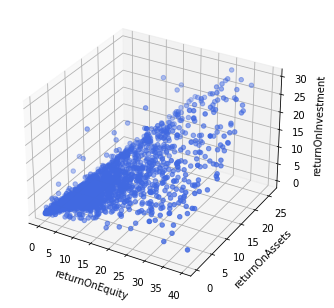

In [41]:
# define a figure and a 3D axis
fig = plt.figure()
ax = Axes3D(fig)

# define the x, y, & z of our scatter plot, this will just be the data from our data frame.
x = list(indicators_df.iloc[:,0])
y = list(indicators_df.iloc[:,1])
z = list(indicators_df.iloc[:,2])

# define the axis labels
column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# define the markers, and the color
ax.scatter(x, y, z, c='royalBlue', marker='o')

plt.show()

***
Looking at this data it does seem to be clumped together with no definite spherical shape, this can cause issues when clustering because naturally, the algorithm looks for the precise structure to cluster the data around. There are steps we can take to help mitigate this issue.

1. **Standard Scaler:** Here we subtract the mean from each data point and divide it by the standard deviation. This method is sensitive to outliers; however, like computing, the mean means taking the average of ALL data points, including the outliers.

2. **Min Max Scaler:** Here we scale the data so that it fits in a range between 0 and 1. Mathematically we take each data point, subtract the minimum from it, and then divide it by the difference of the maximum value and the minimum value. Again, this is sensitive to outliers as the maximum amount would be the outlier.

3. **Robust Scaler:** This method is a better choice if your data has outliers. With this method, we use the interquartile range instead of the minimum and maximum, which helps control for outliers.

By scaling the data, we are allowing our algorithm to perform better with the data. In our example, **because there might be a possibility for outliers, we use the Robust Scaling method.**

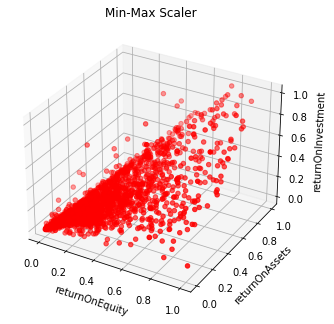

In [42]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(indicators_df)

fig = plt.figure()
ax = Axes3D(fig)

x = X_train_minmax[:,0]
y = X_train_minmax[:,1]
z = X_train_minmax[:,2]

column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

ax.scatter(x, y, z, c='red')

plt.title('Min-Max Scaler')
plt.show()

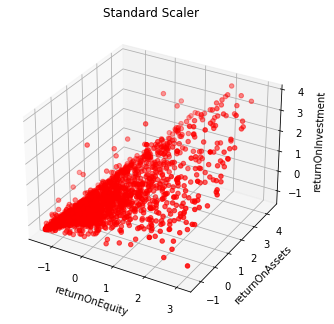

In [43]:
std_scaler = StandardScaler()
X_train_standard = std_scaler.fit_transform(indicators_df)

fig = plt.figure()
ax = Axes3D(fig)

x = X_train_standard[:,0]
y = X_train_standard[:,1]
z = X_train_standard[:,2]

column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

ax.scatter(x, y, z, c='red')

plt.title('Standard Scaler')
plt.show()

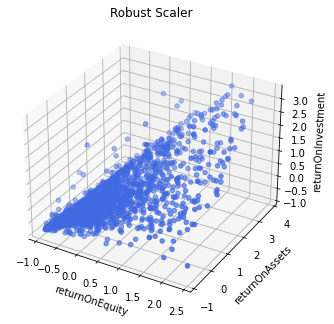

In [44]:
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(indicators_df)

fig = plt.figure()
ax = Axes3D(fig)

x = X_train_robust[:,0]
y = X_train_robust[:,1]
z = X_train_robust[:,2]

column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

ax.scatter(x, y, z, c='royalBlue')

plt.title('Robust Scaler')
plt.show()

***
<h3 style="color:blue;"> (7) Principal Component Analysis (PCA) </h3>

In a clustering algorithm like K-Means, it suffers from long training runs when there are too many attributes. **PCA attempts to remedy this problem by removing the attributes that don't contribute too much to story and keep those attributes which contribute significantly to the story.** With large data sets with multiple attributes, it will allow our model to run faster and have less redundant data.

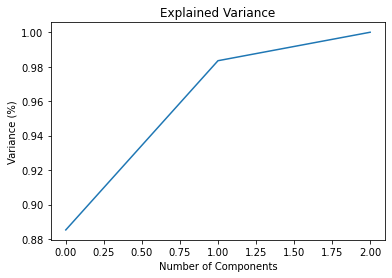

In [45]:
# pass through the scaled data set into our PCA class object
pca = PCA().fit(X_train_robust)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')

plt.show()

***
From the chart above, we can see that we have **100% of variance explained with only two components**. This means that if we were to implement a PCA, we would select our number of components to be 2.

In [46]:
# create a PCA modified dataset
pca_dataset = PCA(n_components=2).fit(X_train_robust).transform(X_train_robust)

# store it in a new data frame
pca_dataset= pd.DataFrame(data = pca_dataset, columns = ['principal component 1', 'principal component 2'])

pca_dataset.head()

,principal component 1,principal component 2
0,-0.629487,-0.200409
1,-0.522683,0.330626
2,-0.433569,0.196831
3,-0.371103,-0.281737
4,1.832524,-0.811197


By running PCA, we have reduced the number of dimensions in our data set from 3 to 2; this means if we graph our new data frame, we will only have two dimensions. **We will not be using PCA because, in a case with such few attributes as our example, PCA is not justified or recommended.**

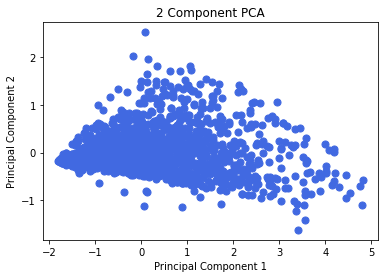

In [47]:
plt.figure()

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')

plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='royalBlue', s = 50)

***
<h3 style="color:blue;"> (8) Building the Model </h3>

One of the biggest challenges with K-Means is determining the optimum number of clusters.

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like the number of clusters visually. This measure has a range of (-1, 1).

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [54]:
results_dict = {}
num_of_clusters = 10

for k in range(2, num_of_clusters):
    
    print("-"*100)
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_robust)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(X_train_robust, kmeans.labels_, metric='euclidean')
    
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
     
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.5409025131522358
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.4715762202588651
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.40576519772835445
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.4176064168154567
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.39545762092592035
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.3683335833104357
--------------------------------------

***
**Ideally the larger the Silhouette Score, the better the results.** Looking at the results above, 2 or 3 should be our target.

Let's also run the results on our PCA data set to see what the output would look like. In this case, we get a higher silhouette score, which is a good sign, and it points to the same outcome, explore a cluster of 2 or 3.

In [53]:
results_dict_pca = {}
num_of_clusters = 10


for k in range(2, num_of_clusters):
    
    print("-"*100)
    results_dict_pca[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    
    results_dict_pca[k]['silhouette_score'] = sil_score
    results_dict_pca[k]['inertia'] = kmeans.inertia_
    results_dict_pca[k]['score'] = kmeans.score
    results_dict_pca[k]['model'] = kmeans
      
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.5491540143144819
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.4844668530469672
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.42238206450605215
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.43465107900612765
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.41597519474715533
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.38528525635039584
------------------------------------

<h3 style="color:blue;"> (9) Plotting the Clusters </h3>

----------------------------------------------------------------------------------------------------


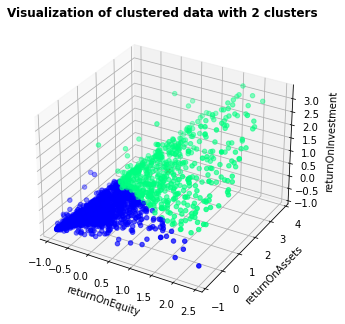

----------------------------------------------------------------------------------------------------


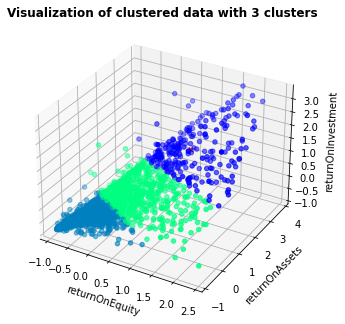

In [50]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(X_train_robust)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]


    # create a new plot
    fig = plt.figure()
    ax = Axes3D(fig)

    # take the scaled data in this example.
    x = X_train_robust[:,0]
    y = X_train_robust[:,1]
    z = X_train_robust[:,2]

    # define the axes labels
    column_names = indicators_df.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])

    # create a new plot
    ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap='winter')
    ax.scatter(C1, C2, C3, marker="x", color='r')

    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')

    plt.show()

***
### Interpreting the plots
We have some companies who perform horribly across all three metrics, that would be the dark blue region in the lower left-hand corner. We then have our average company, denoted by the color green; these are companies who might beat on some metrics, lose on some, or do average. Finally, we have our "show stoppers" these are companies denoted in light blue and represent the companies who are crushing every metric.
***

----------------------------------------------------------------------------------------------------


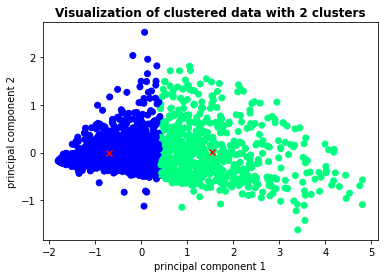

----------------------------------------------------------------------------------------------------


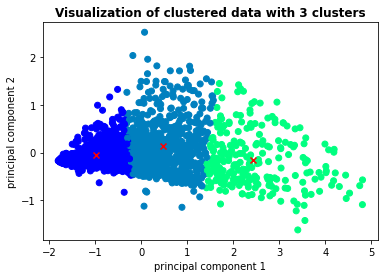

In [51]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(pca_dataset)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]

    # create a new plot
    plt.figure()

    # take the scaled data in this example.
    x = pca_dataset['principal component 1']
    y = pca_dataset['principal component 2']


    # define the axes labels
    column_names = pca_dataset.columns
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])

    # Visualize it:
    plt.scatter(x, y, c=kmeans.labels_.astype(float), cmap='winter')
    plt.scatter(C1, C2, marker="x", color='r')

    # Plot the clustered data
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')
    plt.show()

***
### The Clusters Appear Very Dense

This could impact the K-Means algorithm, and while it might not provide perfect results they could be suboptimal.